In [1]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt

#upload your trained model file.

In [2]:
path_of_saved_model=Path("/content/trained_model.h5")
model=tf.keras.models.load_model(path_of_saved_model)

# Converter

In [3]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

Saved artifact at '/tmp/tmpgp0g4gxp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140338642847520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631613200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631076752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631071648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631081328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631075872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631079216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630603024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630600208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630593344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1403386310748

In [4]:
tflite_model_dir=Path("/content/tflite_model_dir")
tflite_model_dir.mkdir(exist_ok=True,parents=True)

In [5]:
tflite_model_file=tflite_model_dir/"vgg16_model.tflite"
tflite_model_file.write_bytes(tflite_model) # convert into bytes format

59068268

* although the file size is 57MB. iit is too big .as due to our app size will be of max size 25mb..so for that we have to quantize our model

In [6]:
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()
tflite_quant_model_file=tflite_model_dir/"vgg16_model_quant.tflite"
tflite_quant_model_file.write_bytes(tflite_quant_model) # cobert into bytes format

Saved artifact at '/tmp/tmp4p4phkwq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140338642847520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631613200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631076752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631071648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631081328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631075872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338631079216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630603024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630600208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140338630593344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1403386310748

14837312

# Here it is quantized;
* 14837312 or 15mb

# lets check either model is working or not?
* prediction using tflite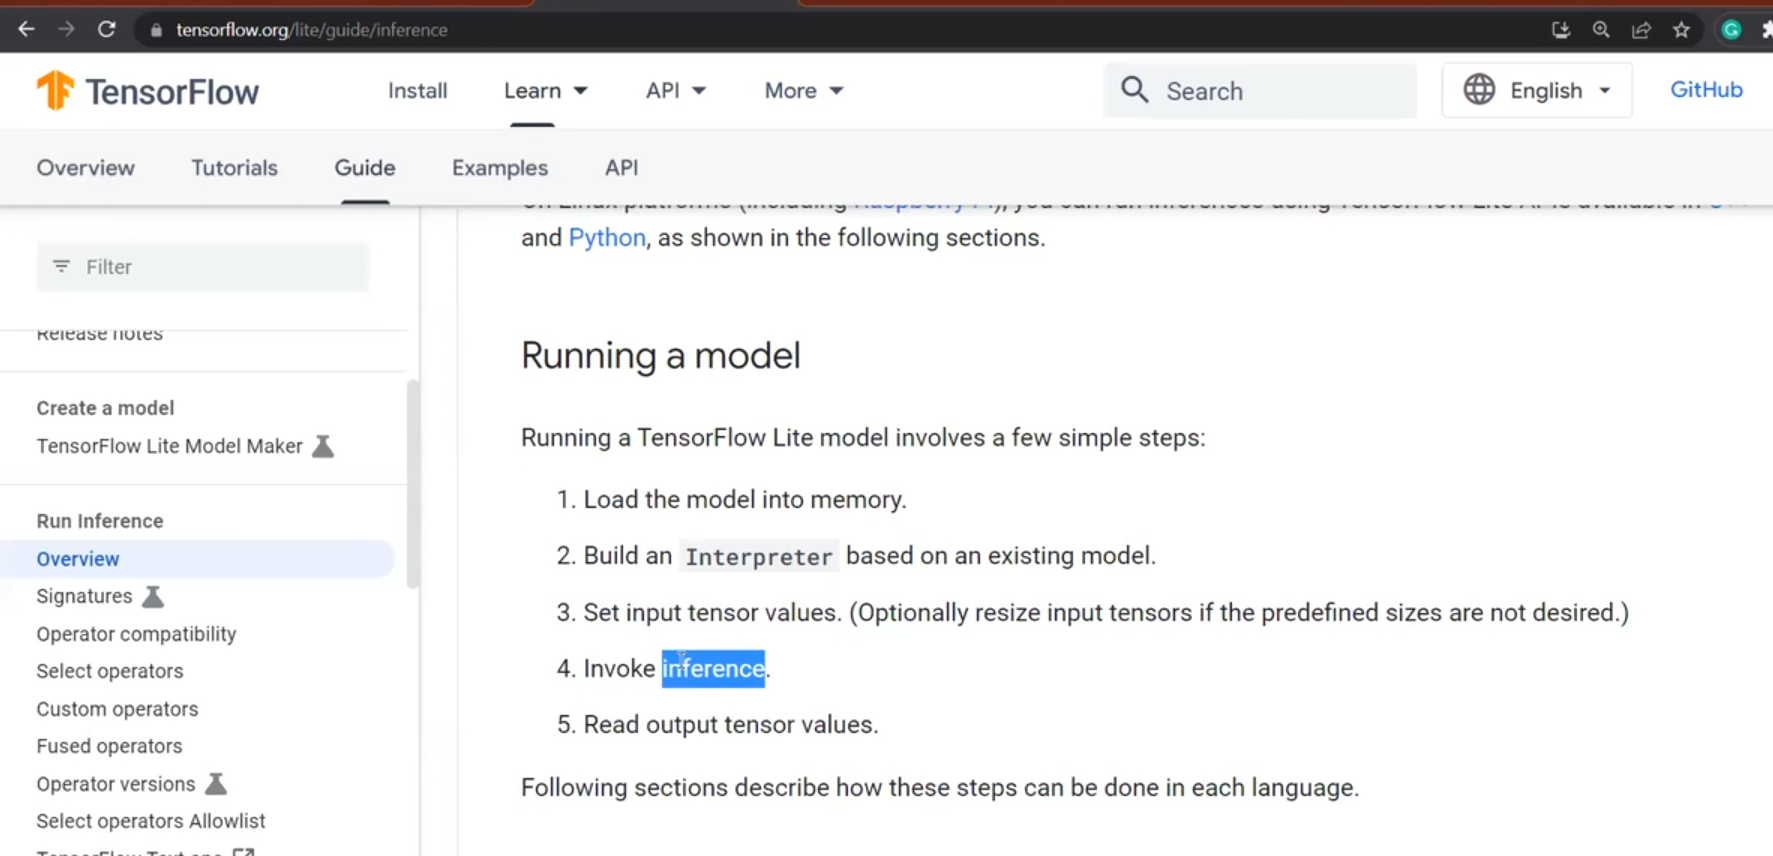

In [15]:
# Now Download the dataset
from pathlib import Path
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt
data_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

# create a directory
def create_dirs(dir_path):
    os.makedirs(dir_path, exist_ok=True)
    print(f"{dir_path} directory created")

ROOT_DATA_DIR = "data" # folder name
create_dirs(ROOT_DATA_DIR)


data_zip_file = "data.zip" # file name
data_zip_path = os.path.join(ROOT_DATA_DIR, data_zip_file)

if not os.path.isfile(data_zip_file):
    print("downloading data...")
    filename, headers = request.urlretrieve(data_URL, data_zip_path)
    print(f"filename: {filename} created with info \n{headers}")
else:
    print(f"file is already present")

data directory created
downloading data...
filename: data/data.zip created with info 
Content-Type: application/zip
Content-Length: 47286322
Connection: close
Last-Modified: Wed, 15 Mar 2017 18:46:00 GMT
x-amz-version-id: null
Accept-Ranges: bytes
Server: AmazonS3
Date: Wed, 11 Dec 2024 04:50:07 GMT
ETag: "5f8c32a6554f6acb4d649776e7735e48"
X-Cache: Hit from cloudfront
Via: 1.1 97ed0d1f8de4f60b953cac258482a042.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: SIN2-P6
X-Amz-Cf-Id: QIRAep9IvuYusZ7DBZJ6gEef5xGVTkD9Etf9cfV62E_HcyD3DDzfnw==
Age: 16950




In [12]:
# Unzipping of data
from zipfile import ZipFile

unzip_data_dirname = "unzip_data_dir"
unzip_data_dir = os.path.join(ROOT_DATA_DIR, unzip_data_dirname)

if not os.path.exists(unzip_data_dir):
    os.makedirs(unzip_data_dir, exist_ok=True)
    with ZipFile(data_zip_path) as f:
        f.extractall(unzip_data_dir)
else:
    print(f"data already extacted")

In [13]:
# prediction using tflite
interpreter=tf.lite.Interpreter(model_path='/content/tflite_model_dir/vgg16_model_quant.tflite')  #load tflite model
interpreter.allocate_tensors() #allocat the tensors



In [14]:
input_details=interpreter.get_input_details()
input_details[0]['shape']

array([  1, 224, 224,   3], dtype=int32)

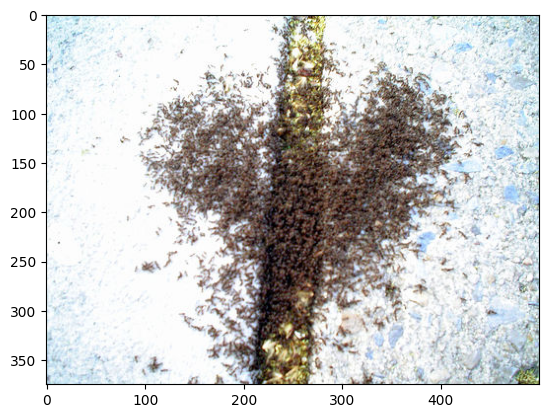

In [17]:
text_img=plt.imread("/content/data/unzip_data_dir/hymenoptera_data/val/ants/10308379_1b6c72e180.jpg")
plt.imshow(text_img)


In [18]:
text_img.shape

(375, 500, 3)

So, we have to convert out test_imge into array([  1, 224, 224,   3], dtype=int32)

In [23]:
resized_img=tf.image.resize(text_img, (224,224))
resized_img.shape

TensorShape([224, 224, 3])

In [30]:
#lets expand the dimesion [1,224,224,3]
input_img=tf.expand_dims(resized_img,axis=0)
input_img.shape

TensorShape([1, 224, 224, 3])

In [29]:
input_index=interpreter.get_input_details()[0]['index']
output_index=interpreter.get_output_details()[0]['index']



In [28]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 50,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [32]:
# final step:
interpreter.set_tensor(input_index,input_img)
interpreter.invoke()
pred=interpreter.get_tensor(output_index)
pred

array([[0.00392862, 0.99607134]], dtype=float32)

In [33]:
label_map={0:"ants",1:"bees"}


In [36]:
argmax=tf.argmax(pred[0]).numpy()
label_map[argmax]

'bees'

# Lets Summarize all these step inside a fucntion

In [37]:
def prediction(test_img):
  #do Image Pre-Processing
  #1. let's resized the image
  resized_img=tf.image.resize(text_img, (224,224))
  #2. lets expand the dimesion [1,224,224,3]
  input_img=tf.expand_dims(resized_img,axis=0)

  # load the tflite model
  interpreter=tf.lite.Interpreter(model_path='/content/tflite_model_dir/vgg16_model_quant.tflite')  #load tflite model
  interpreter.allocate_tensors() #allocat the tensors
  input_details=interpreter.get_input_details()

  #lets do the prediction
  input_index=interpreter.get_input_details()[0]['index']
  output_index=interpreter.get_output_details()[0]['index']

  # final step:
  interpreter.set_tensor(input_index,input_img)
  interpreter.invoke()
  pred=interpreter.get_tensor(output_index)
  label_map={0:"ants",1:"bees"}
  argmax=tf.argmax(pred[0]).numpy()
  result=label_map[argmax]
  return result

Text(0.5, 1.0, 'Predicted Result:ants')

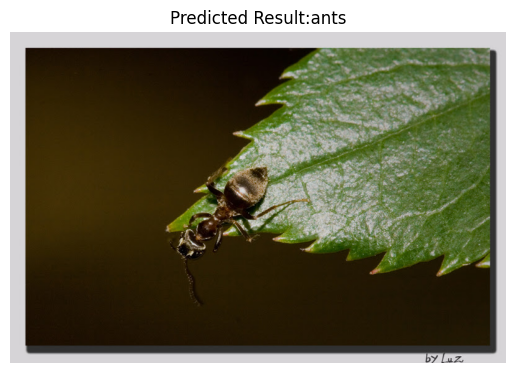

In [47]:
text_img=plt.imread("/content/data/unzip_data_dir/hymenoptera_data/val/ants/Hormiga.jpg")
t=prediction(text_img)
plt.imshow(text_img)
plt.axis("off")
plt.title(f"Predicted Result:{t}")


* You can go with tflite runtime : it is more lite model